<a href="https://colab.research.google.com/github/EErasmus/System-Modeling-and-Analysis-Project/blob/master/SVM_Stock_Prediction_Model_Open.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

In [2]:
#Store and show the data
df = pd.read_csv('/content/drive/MyDrive/Informatics/Politechnika Wroclawska/SMAA/SMAA Project/Dataset/aapl.us.2017.oct.csv')
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,02/10/2017,153.71,153.90,152.17,153.26,18749860,0
1,03/10/2017,153.46,154.53,153.36,153.92,16277486,0
2,04/10/2017,153.08,153.31,151.91,152.93,20188277,0
3,05/10/2017,153.63,154.88,153.50,154.83,21341803,0
4,06/10/2017,154.41,154.93,154.01,154.74,17448243,0
5,09/10/2017,155.25,156.17,154.93,155.28,16302190,0
6,10/10/2017,155.50,157.43,154.54,155.34,15659866,0
7,11/10/2017,155.41,156.42,155.19,155.99,16942261,0
8,12/10/2017,155.79,156.81,155.17,155.44,16440001,0
9,13/10/2017,156.17,156.72,155.85,156.43,16432666,0


In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
17,25/10/2017,156.35,156.99,154.71,155.85,21253629,0
18,26/10/2017,156.67,157.26,156.22,156.85,16993593,0
19,27/10/2017,158.72,163.01,158.13,162.47,44561025,0
20,30/10/2017,163.30,167.47,163.13,166.12,44861465,0
21,31/10/2017,167.30,169.04,166.34,168.43,36176411,0


In [4]:
#Get the number of rows and columns
df.shape

(22, 7)

In [5]:
#Get and print the last row of data
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Volume,OpenInt
21,31/10/2017,167.3,169.04,166.34,168.43,36176411,0


In [12]:
#Prepare the data for training the SVR models
#Get all of the data except for the last row
df = df.head(len(df) - 1)
#Print the new data set
print(df)

          Date    Open    High     Low   Close    Volume  OpenInt
0   02/10/2017  153.71  153.90  152.17  153.26  18749860        0
1   03/10/2017  153.46  154.53  153.36  153.92  16277486        0
2   04/10/2017  153.08  153.31  151.91  152.93  20188277        0
3   05/10/2017  153.63  154.88  153.50  154.83  21341803        0
4   06/10/2017  154.41  154.93  154.01  154.74  17448243        0
5   09/10/2017  155.25  156.17  154.93  155.28  16302190        0
6   10/10/2017  155.50  157.43  154.54  155.34  15659866        0
7   11/10/2017  155.41  156.42  155.19  155.99  16942261        0
8   12/10/2017  155.79  156.81  155.17  155.44  16440001        0
9   13/10/2017  156.17  156.72  155.85  156.43  16432666        0
10  16/10/2017  157.33  159.43  157.09  159.31  24182814        0
11  17/10/2017  159.21  160.29  158.66  159.90  19040557        0
12  18/10/2017  159.85  160.13  159.03  159.19  16314850        0
13  19/10/2017  156.19  156.52  154.46  155.42  42539211        0
14  20/10/

In [13]:
#Create empty lists to store the independent and dependent data
days = list()
open_prices = list()

In [14]:
#Get the dates and close prices
df_days = df.loc[:, 'Date']
df_open = df.loc[:, 'Open']

In [15]:
#Create the independent data set
for day in df_days:
    days.append( [int(day.split('/')[0])] )

#Create the dependent data set
for open_price in df_open:
  open_prices.append(float(open_price) )

In [16]:
#Print the days and the close prices
print(days)
print(open_prices)

[[2], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [25], [26], [27]]
[153.71, 153.46, 153.08, 153.63, 154.41, 155.25, 155.5, 155.41, 155.79, 156.17, 157.33, 159.21, 159.85, 156.19, 156.05, 156.33, 155.73, 156.35, 156.67, 158.72]


In [17]:
#Create the 3 Support Vector Regression Models

#Create and train a SVR model using a linear kernel
lin_svr = SVR(kernel= 'linear', C = 1000.0)
lin_svr.fit(days, open_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
#Create and train a SVR model using a polynomial kernel
poly_svr = SVR(kernel= 'poly', C = 1000.0, degree = 2)
poly_svr.fit(days, open_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
#Create and train a SVR model using a rbf kernel
rbf_svr = SVR(kernel= 'rbf', C = 1000.0, gamma = 0.15)
rbf_svr.fit(days, open_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

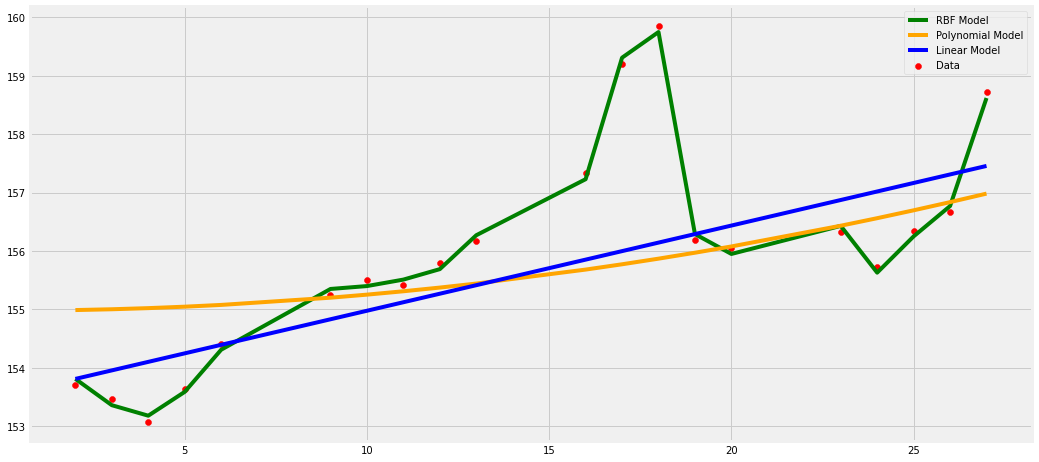

In [20]:
plt.figure(figsize=(16,8))
plt.scatter(days, open_prices, color = 'red', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label = 'Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label = 'Linear Model')
plt.legend()
plt.show()

In [21]:
#Show the predicted price for the given day
day = [[31]]

print('The RBF SVR predicted:', rbf_svr.predict(day))
print('The Linear SVR predicted:', lin_svr.predict(day))
print('The Polynomial SVR predicted:', poly_svr.predict(day))

The RBF SVR predicted: [158.08296863]
The Linear SVR predicted: [158.04058824]
The Polynomial SVR predicted: [157.62105487]


In [22]:
#Print the actual price of the stock on day 31
print('The actual price:', actual_price['Open'])

The actual price: 21    167.3
Name: Open, dtype: float64
